### Solutions for Problem Set #1

This notebook is in html. To be able to run it, please click: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gunerilhan/economicgrowth/blob/master/ps1/ps1.ipynb)

First import some of the package we will use in this exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('https://gunerilhan.github.io/img/fivethirtyeight-modified.mplstyle')

In [2]:
# Read in Madison Project Database legend, so that we know which variables to use
df_legend = pd.read_excel('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx'
                          ,sheet_name='Notes',skiprows=14)
# Rename columns
df_legend.rename(columns={'Unnamed: 0':'Variable name','Unnamed: 1':'Definition'},
                 inplace=True)
df_legend.dropna(inplace=True)
# Create a dictionary of var names and definitions
df_legend = dict(zip(df_legend['Variable name'],df_legend['Definition']))

In [3]:
# Here is my dictionary
df_legend

{'Sources': 'Sources for GDP pc and population data',
 'Full data': 'Data in a single table',
 'GDP pc': 'Real GDP per capita in 2011$',
 'Population': 'Population, mid-year (thousands)',
 'Regional data': 'Regional GDP per capita and population estimates'}

In [4]:
# The variable we will use
df_legend['GDP pc']

'Real GDP per capita in 2011$'

In [5]:
# Read in the data
df = pd.read_excel('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx',
                   sheet_name='Full data')

In [6]:
# First 5 rows of our data looks like this
df.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [7]:
# Select 2000 data and add as separate column to orginal data
df=df.merge(df.query('year == 2000')[['countrycode','gdppc']],
            on='countrycode',suffixes=('',', 2000'))

In [8]:
# Calculate percentage change and multiply by 100 to convert into percentages
# I call it a growth rate, not annual but over many years
# Notice that percentage change from 2000 is calculated for each year
df['Growth rate']=(df.gdppc/df['gdppc, 2000']-1)*100

In [9]:
df.head()

,countrycode,country,year,gdppc,pop,"gdppc, 2000",Growth rate
0,AFG,Afghanistan,1820,NaN,3280.0,502.3727,NaN
1,AFG,Afghanistan,1870,NaN,4207.0,502.3727,NaN
2,AFG,Afghanistan,1913,NaN,5730.0,502.3727,NaN
3,AFG,Afghanistan,1950,1156.0,8150.0,502.3727,130.108045
4,AFG,Afghanistan,1951,1170.0,8284.0,502.3727,132.894821


In [10]:
# The list of countries asked in the question
countries = ['Ethiopia','Ghana','U.R. of Tanzania: Mainland','Uganda','Burkina Faso',
            'Nigeria','Kenya','D.R. of the Congo',
            'Botswana','Malawi','Benin','Namibia',
            'Cameroon','Niger',"Côte d'Ivoire",
            'United States','Germany','United Kingdom',
            'France','Spain']
# I will highligh these countries in the plot below
country_select = ['U.R. of Tanzania: Mainland','Ghana','Kenya','Cameroon','Germany',
                 'United Kingdom']

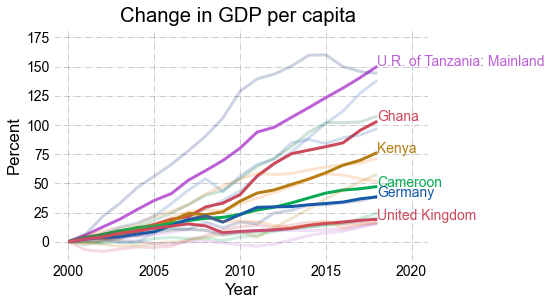

In [11]:
# for each country in our list, plot percent change in GDP per capita
# relative to 2000 for each year
for country in countries:
    # select a country and years later than 2000
    data = df.query(f'(country =="{country}" ) & (year >= 2000)').copy()
    # if I don't want to highlight the country, make line transparent
    alpha = 1 if country in country_select else 0.2
    #plot
    p=plt.plot(data.year,data['Growth rate'],alpha=alpha)
    #annotate for the selected countries
    if country in country_select:
        loc_ = data.iloc[-1][['year','Growth rate']].values
        plt.annotate(country,loc_,color=p[0].get_color(),alpha=1);
plt.xlim(xmax=2021);
plt.ylim(ymax=183)
plt.xlabel('Year')
plt.ylabel('Percent');
plt.title('Change in GDP per capita ');

In [12]:
# Create the table that is asked in the question
# Select year 2018, as we are interest in percentage from 2000 to 2018
# Keep GDP pc in 2000 value (not GDP pc in 2018)
df2 =(df.query(f'country.isin({countries}) & (year == 2018)')
                [['country','gdppc, 2000','Growth rate']]
    .sort_values('Growth rate',ascending=False)).set_index('country').copy()

In [13]:
df2.round(decimals=1)

,"gdppc, 2000",Growth rate
country,,
U.R. of Tanzania: Mainland,1148.7,150.3
Nigeria,2144.8,144.2
Ethiopia,771.7,138.2
D.R. of the Congo,414.0,107.6
Ghana,2100.3,103.2
Botswana,8044.1,96.9
Kenya,1914.9,76.4
Uganda,1192.0,71.6
Côte d'Ivoire,2352.9,57.8


In [14]:
# Correlation between initial GDP pc (in 2000) and percentage change
df2.corr().iloc[0]['Growth rate']

-0.5015110635104548

Text(0, 0.5, 'Change in GDP pc, 2000-2018, %')

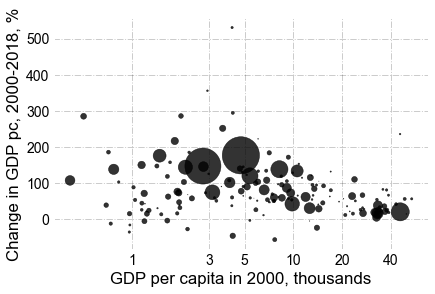

In [15]:
# Scatter plot of countries 
data = df.query('year == 2018').copy()
plt.scatter(data['gdppc, 2000'],data['Growth rate'],color='k',sizes=data['pop']/1000,alpha=0.8)
plt.xscale('log')
xlabels = [1000,3000,5000,10000,20000,40000];
plt.xticks(xlabels,labels=[1,3,5,10,20,40]);
plt.xlabel('GDP per capita in 2000, thousands')
plt.ylabel('Change in GDP pc, 2000-2018, %')

In [16]:
# Correlation between initial GDP pc and growth rate in the entire data set
data[['gdppc, 2000','Growth rate']].corr().iloc[0]['Growth rate']

-0.24390976923370086

In [17]:
# import a package to run OLS regressions
import statsmodels.formula.api as smf

In [18]:
# Keep year 2018 to run a cross section regression
# as is Kremer et al. (2020)
df_reg = df.query('year == 2018').copy()

In [19]:
# Generate average annual growth rate
df_reg['AAGR']=(np.log(df_reg.gdppc)-np.log(df_reg['gdppc, 2000']))/18
# take the log of initial GDP pc
df_reg['log_gdppc_2000'] = np.log(df_reg['gdppc, 2000'])

In [20]:
df_reg.head()

,countrycode,country,year,gdppc,pop,"gdppc, 2000",Growth rate,AAGR,log_gdppc_2000
71,AFG,Afghanistan,2018,1934.5550,34940.837000,502.3727,285.083624,0.074905,6.219342
140,AGO,Angola,2018,7771.4418,22637.958640,2013.6362,285.940708,0.075029,7.607697
251,ALB,Albania,2018,11104.1665,3062.734429,4808.4796,130.928847,0.046497,8.478136
320,ARE,United Arab Emirates,2018,76397.8181,9619.465681,48888.0321,56.271003,0.024801,10.797288
469,ARG,Argentina,2018,18556.3831,44694.768930,14368.9427,29.142300,0.014208,9.572824


In [21]:
# Regress AAGR on an intercept and log of GDP pc in 2000
results = smf.ols('AAGR ~ log_gdppc_2000', data=df_reg).fit()

In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAGR   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.611
Date:                Fri, 20 May 2022   Prob (F-statistic):             0.0332
Time:                        16:14:05   Log-Likelihood:                 417.42
No. Observations:                 169   AIC:                            -830.8
Df Residuals:                     167   BIC:                            -824.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0535      0.012      4.

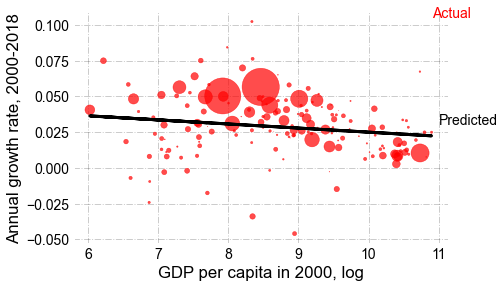

In [23]:
# Plot actual values
plt.scatter(df_reg['log_gdppc_2000'],df_reg['AAGR'],color='r',
            sizes=df_reg['pop']/1000,alpha=0.7)
# Plot fitted or predicted values
plt.plot(df_reg['log_gdppc_2000'],
         results.params.iloc[0]+results.params.iloc[1]*df_reg['log_gdppc_2000'],color='k')
plt.xlabel('GDP per capita in 2000, log')
plt.ylabel('Annual growth rate, 2000-2018')
plt.annotate('Predicted',(11,0.03))
plt.annotate('Actual',(10.9,0.105),color='r')
plt.savefig('./predicted.pdf',bbox_inches='tight')

1. Consider the Solow model. Suppose the production function is $Y = A K^\alpha (hL)^{1-\alpha}.$

- Convert the above production function (for aggregate output) into a per-worker production function, $y=f(k)$. i.e. clearly specify the functional form of $f(k).$ 

- Write down the formula for the change in capital per worker, $\dot{k}$, as a function of capital per worker, $k$, and other exogenous variables in the model.

- Suppose that investment rate is 20\%, $\gamma =0.2$, depreciation rate is 5\%, $\delta=0.05$, population growth rate is 1\%, $n=0.01$, $A=1$, $h=1$, and $\alpha=0.33$.

a. Calculate the investment per worker in the economy for each of the following capital per worker levels: $k= 5.6,5.7,5.8,5.9,6,6.03,6.1,6.2,6.3$ 

b.  Calculate the capital per worker dilution, $(\delta+n)k$, for each of the capital per worker levels listed in part a.  

c. Using the values you found in part a and b, plot a Solow diagram. For each of the capital per worker levels listed in part a, calculate the change in capital per worker, $\dot{k}$.  

Divide both left and right hand side with $L$

$$\frac{Y}{L} = \frac{A K^\alpha (hL)^{1-\alpha}}{L} = \frac{A K^\alpha (hL)^{1-\alpha}}{L^\alpha L^{1-\alpha}} = A \left(\frac{K}{L}\right)^\alpha \left(\frac{hL}{L}\right)^{1-\alpha}$$
$$f(k) = A k^\alpha h^{1-\alpha}$$

In [24]:
# Assign parameter values
alpha = 0.33
gamma = 0.2
delta = 0.05
n = 0.01
A = 1
h = 1
# sequence of capital per worker and output per worker to be filled later.
k_seq  = np.array([5.6,5.7,5.8,5.9,6,6.03,6.1,6.2,6.3])

$\dot{k}=\gamma Ak_t^\alpha h^{1-\alpha} - (n + \delta)k$,
where invesment per worker $= \gamma Ak_t^\alpha h^{1-\alpha}$


In [25]:
# investment per worker
i_seq = gamma*A*k_seq**alpha*h**(1-alpha)
# capital dilution per worker
d_seq = (n+delta)*k_seq
# change in capital per worker
k_dot = i_seq - d_seq

In [26]:
pd.DataFrame(data={'Capital per worker':k_seq,
                   'Investment per worker':i_seq,
                  'Capital depreciation + dilution per worker':d_seq,
                  'Change in capital per worker':k_dot}).round(decimals=3)

,Capital per worker,Investment per worker,Capital depreciation + dilution per worker,Change in capital per worker
0,5.60,0.353,0.336,0.017
1,5.70,0.355,0.342,0.013
2,5.80,0.357,0.348,0.009
3,5.90,0.359,0.354,0.005
4,6.00,0.361,0.360,0.001
5,6.03,0.362,0.362,0.000
6,6.10,0.363,0.366,-0.003
7,6.20,0.365,0.372,-0.007
8,6.30,0.367,0.378,-0.011


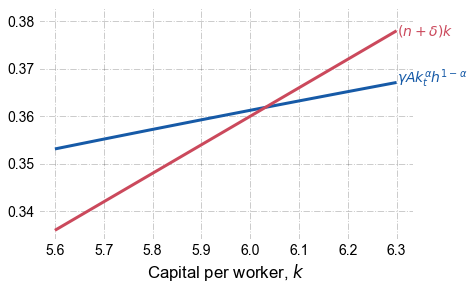

In [27]:
p=plt.plot(k_seq,i_seq)
plt.annotate(r'$\gamma Ak_t^\alpha h^{1-\alpha}$',(6.3,0.367),color=p[0].get_color())
p=plt.plot(k_seq,d_seq)
plt.annotate(r'$(n + \delta)k$',(6.3,0.377),color=p[0].get_color())
plt.xlabel('Capital per worker, $k$')
plt.ylim(ymax=0.383);

Text(0, 0.5, '$\\dot{k}$')

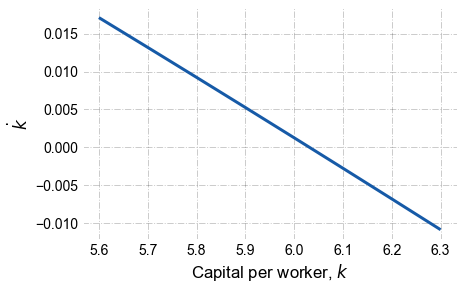

In [28]:
plt.plot(k_seq,k_dot)
plt.xlabel('Capital per worker, $k$')
plt.ylabel('$\dot{k}$')